# Stability diagram

In [7]:
%reset -f
import numpy as np

import matplotlib.pyplot as plt
import scipy as sc
import scipy.stats as st
import scipy.special as spec
import matplotlib as mpl
from matplotlib.colors import LogNorm
import matplotlib.cm as cm
import scipy.integrate as integrate
import pickle as pkl
import multiprocessing as mp

%matplotlib notebook




In [8]:

# Set style of plots
colwidth=3.5
figwidth=6
figheight=4.5
ticksize= 8 *figwidth/colwidth 
labelsize=10 *figwidth/colwidth
titlesize = 10 *figwidth/colwidth
annotatesize= ticksize*1
# mpl.style.use('classic')
mpl.rcParams.update({'font.size':ticksize }) 
mpl.rcParams.update({'legend.fontsize':ticksize })# legend
mpl.rcParams.update({'ytick.labelsize':ticksize})
mpl.rcParams.update({'xtick.labelsize':ticksize})
mpl.rcParams.update({'axes.titlesize':titlesize})       # Title
mpl.rcParams.update({'axes.labelsize':labelsize})    # x,y,cbar labels
mpl.rcParams.update({'figure.titlesize' :titlesize})
mpl.rcParams.update({'savefig.bbox':'tight'})
mpl.rcParams.update({'axes.formatter.limits':[-3,3]})
mpl.rcParams.update({'figure.figsize':[figwidth,figheight]})
mpl.rcParams.update({'image.cmap':'jet'})
mpl.rcParams.update({'axes.formatter.useoffset':True})   # no offset of axis
mpl.rcParams.update({'axes.formatter.use_mathtext':True}) # Change from 1e4 to 10^4 

# mpl.rcParams.update({'mathtext.fontset':'cm'})
if 0 :
    mpl.rcParams.update({'font.style':'normal'})
    mpl.rcParams['mathtext.fontset'] = 'custom'
    mpl.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
    mpl.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
    mpl.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'

# To get sans-serif
# mpl.rc('font', **{'sans-serif' : 'Arial','family' : 'sans-serif'})
# mpl.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})

# To use unicode
# params = {'text.usetex': False, 'mathtext.fontset': 'stixsans'}
# params = {'text.usetex': True , 'mathtext.fontset': 'stixsans'}
# plt.rcParams.update(params)

# To be able to use SI units as micro (automatically upright)
# plt.rc('text', usetex = True)
# mpl.rcParams.update({'text.latex.preamble': [r'\usepackage{siunitx}', r'\usepackage{cmbright}']})
# plt.rcParams.update(params)


In [9]:
mpl.__version__

'3.0.0'

# Functions

In [10]:
def distributions(Qs,dist_nr=1):
    Qa = Qs[0]
    Qz = Qs[-1]
    nQ = np.size(Qs)
    
    dist = np.zeros(nQ)
    
    if dist_nr==1:
        sigma = (Qz-Qa)/12
        mQ = Qa+(Qz-Qa)*.5
        dist = np.exp(-(Qs-mQ)**2/(2*sigma**2))
        
    elif dist_nr==2:
        sigma = (Qz-Qa)/12
        Q0 = Qa+(Qz-Qa)*.2
        dist[Qs>=Q0] = ((Qs-Q0)/sigma*np.exp(-(Qs-Q0)/sigma))[Qs>=Q0]
        
    elif dist_nr==3:
        sigma = (Qz-Qa)/12
        mQ = Qa+(Qz-Qa)*.5
        dist = np.exp(-(Qs-mQ)**4/(2*sigma**4))
        
    A = np.trapz(dist,Qs)
    dist = dist/A
    distf = sc.interpolate.interp1d(Qs,dist,kind='quadratic',bounds_error=False,fill_value=0)
    return distf

# Example

<IPython.core.display.Javascript object>


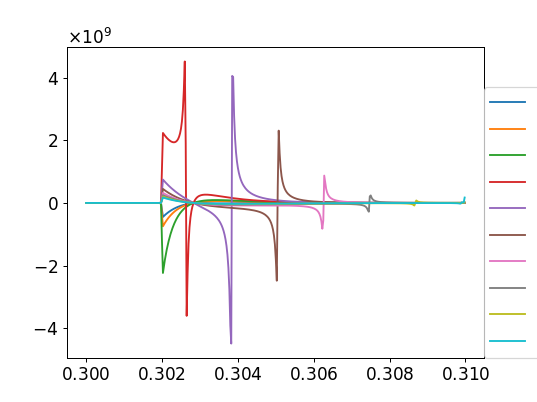

/home/sfuruset/miniconda3/lib/python3.5/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [11]:
Qs = np.linspace(0.30,0.31,2000)
distf = distributions(Qs,2)
Qs = Qs[::5]
dQ = np.diff(Qs[:2])*1
epsilon=2e-5
bool_plotintegrand=1

def integrand(Q):
    return (distf(Qs+dQ) - distf(Qs-dQ))/(2*dQ) / (Q-Qs+1j*epsilon)

Qwidth = Qs[-1]-Qs[0]
Qfree = np.linspace(Qs[0]-.1*Qwidth,Qs[-1]+.1*Qwidth,100)
Qsmid = np.linspace(Qs[0]+.1*Qwidth,Qs[-1]-.1*Qwidth,100)
BTFs = np.zeros_like(Qfree,dtype=complex)


if bool_plotintegrand:
    plt.figure()
for iQ,Q in enumerate(Qfree):
    BTFs[iQ] = np.trapz(integrand(Q),Qs)
    if bool_plotintegrand and iQ%10==0:
        plt.plot(Qs,integrand(Q),label=Q)
if bool_plotintegrand:
    lgd = plt.legend(loc=(1,0))
#     plt.tight_layout()

<IPython.core.display.Javascript object>


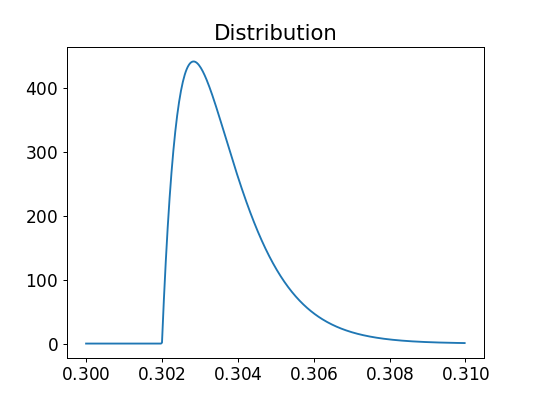

<IPython.core.display.Javascript object>


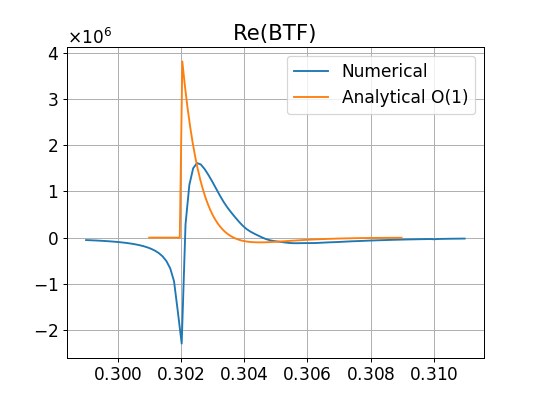

<IPython.core.display.Javascript object>


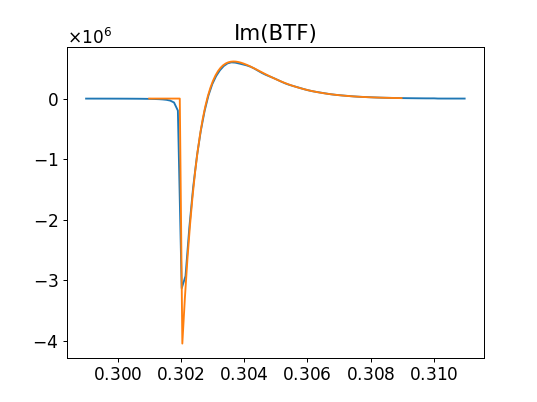

<IPython.core.display.Javascript object>


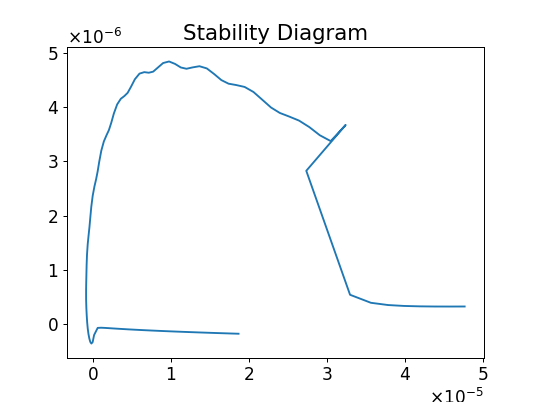

<IPython.core.display.Javascript object>


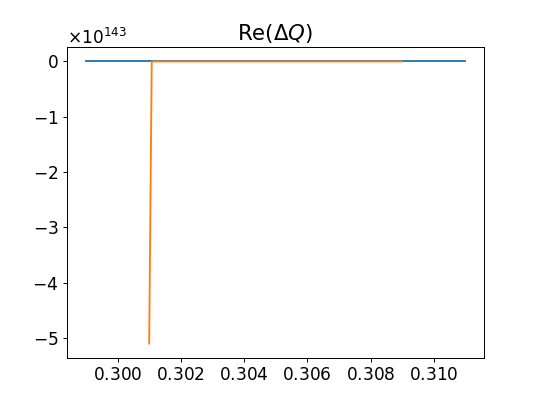

<IPython.core.display.Javascript object>


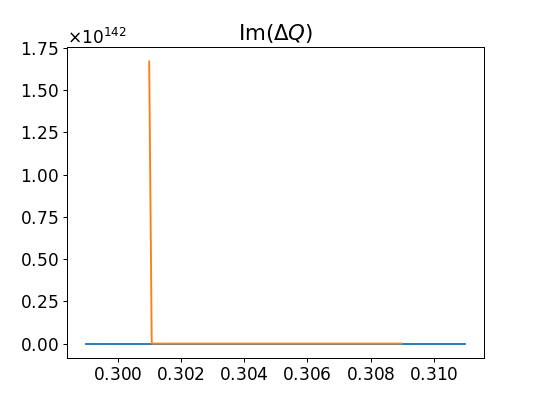

In [13]:
plt.figure()
plt.title('Distribution')
plt.plot(Qs,distf(Qs))



plt.figure()
plt.title('Re(BTF)')
plt.grid(True)
plt.plot(Qfree,BTFs.real,label='Numerical')
C = .0006
distf2 = (distf(Qsmid+dQ)  -2*distf(Qsmid)   +distf(Qsmid-dQ))/dQ**2
distf4 = (distf(Qsmid+2*dQ)-4*distf(Qsmid+dQ)+6*distf(Qsmid)-4*distf(Qsmid-dQ)+distf(Qsmid-2*dQ))/dQ**4
BTFreal_fo = -(distf(Qsmid+dQ)-2*distf(Qsmid)+distf(Qsmid-dQ))/dQ**2  * 2*C
plt.plot(Qsmid,BTFreal_fo,label='Analytical O(1)')
# BTFreal_fo = -distf2 *2*C - distf4 * C**3
# plt.plot(Qsmid,BTFreal_fo,label='Analytical O(3)')
plt.legend(loc=0)

plt.figure()
plt.title('Im(BTF)')
plt.plot(Qfree,BTFs.imag)
BTFimag_fo = -np.pi*(distf(Qsmid+dQ)-distf(Qsmid-dQ))/(dQ*2)
plt.plot(Qsmid,BTFimag_fo )



plt.figure()
plt.title('Stability Diagram')
Qr = -BTFs.real/np.abs(BTFs)**2
tau=  BTFs.imag/np.abs(BTFs)**2
plt.plot(Qr,tau)

Qr_fo = - BTFreal_fo / (BTFreal_fo**2+BTFimag_fo**2)
tau_fo=   BTFimag_fo / (BTFreal_fo**2+BTFimag_fo**2)
# plt.plot(Qr_fo,tau_fo,'<--')

# New idea
if 0:
    dQfree = Qfree-0.31
    tau2 = BTFs.imag * (dQfree)**2
    plt.plot(dQfree,tau2)

plt.figure()
plt.title(r'Re($\Delta Q$)')
plt.plot(Qfree,Qr)
plt.plot(Qsmid,Qr_fo)

plt.figure()
plt.title(r'Im($\Delta Q$)')
plt.plot(Qfree,tau)
plt.plot(Qsmid,tau_fo)

In [6]:
Qs = np.linspace(0.0,1,1000)
distf = distributions(Qs,2)
dQ = Qs[1]-Qs[0]
Qf = Qs[::5]

C = 0.1
distf1 = (distf(Qf+dQ)-distf(Qf-dQ))/dQ*.5 * C
distf2 = (distf(Qf+dQ)-2*distf(Qf)+distf(Qf-dQ))/dQ**2 *C**2
distf3 = (distf(Qf+2*dQ)-2*distf(Qf+dQ)+2*distf(Qf-dQ)-distf(Qf-2*dQ))/dQ**3/2 *C**3
distf4 = (distf(Qf+2*dQ)-4*distf(Qf+dQ)+6*distf(Qf)-4*distf(Qf-dQ)+distf(Qf-2*dQ))/dQ**4 *C**4

plt.figure()
plt.title('Distribution and its derivatives')
plt.plot(Qs,distf(Qs),label='f')
plt.plot(Qf,distf1,label='f^{(1)}')
plt.plot(Qf,distf2,label='f^{(2)}')
# plt.plot(Qf,distf3,label='f^{(3)}')
plt.plot(Qf,distf4,label='f^{(4)}')
plt.legend(loc=0)
plt.ylim(-5,5)

(-5, 5)

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7ff1ad58fd08> (for post_execute):


RuntimeError: latex was not able to process the following string:
b'f^{(1)}'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.16 (TeX Live 2015/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode

(/home/sfuruset/.cache/matplotlib/tex.cache/633771096c6bb3d3b0b9a6198e7a1246.te
x
LaTeX2e <2016/02/01>
Babel <3.9q> and hyphenation patterns for 81 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/utf8.def
(/usr/share/texlive/texmf-dist/tex/latex/base/t1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ot1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/omsenc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.dfu)))
(/usr/share/texlive/texmf-dist/tex/latex/siunitx/siunitx.sty
(/usr/share/texlive/texmf-dist/tex/latex/l3kernel/expl3.sty
(/usr/share/texlive/texmf-dist/tex/latex/l3kernel/expl3-code.tex)
(/usr/share/texlive/texmf-dist/tex/latex/l3kernel/l3dvips.def))
(/usr/share/texlive/texmf-dist/tex/latex/l3packages/xparse/xparse.sty)
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amstext.sty
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsgen.sty))
(/usr/share/texlive/texmf-dist/tex/latex/tools/array.sty)
(/usr/share/texlive/texmf-dist/tex/latex/l3packages/l3keys2e/l3keys2e.sty)
(/usr/share/texlive/texmf-dist/tex/latex/beamer/translator/translator.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/latex/beamer/translator/translator-language-
mappings.tex))) (/usr/share/texlive/texmf-dist/tex/latex/cmbright/cmbright.sty
(/usr/share/texlive/texmf-dist/tex/latex/cmbright/ot1cmbr.fd))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/share/texlive/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

)
No file 633771096c6bb3d3b0b9a6198e7a1246.aux.
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1cmr.fd)
(/usr/share/texlive/texmf-dist/tex/latex/beamer/translator/dicts/translator-bas
ic-dictionary/translator-basic-dictionary-English.dict)
(/usr/share/texlive/texmf-dist/tex/latex/siunitx/siunitx-abbreviations.cfg)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
(/usr/share/texlive/texmf-dist/tex/latex/cmbright/omlcmbrm.fd)
(/usr/share/texlive/texmf-dist/tex/latex/cmbright/omscmbrs.fd)
(/usr/share/texlive/texmf-dist/tex/latex/cmbright/ot1cmtl.fd)
! Missing $ inserted.
<inserted text> 
                $
l.15 \fontsize{13.714286}{17.142857}{\sffamily f^
                                                 {(1)}}
No pages of output.
Transcript written on 633771096c6bb3d3b0b9a6198e7a1246.log.




RuntimeError: latex was not able to process the following string:
b'f^{(1)}'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.16 (TeX Live 2015/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode

(/home/sfuruset/.cache/matplotlib/tex.cache/633771096c6bb3d3b0b9a6198e7a1246.te
x
LaTeX2e <2016/02/01>
Babel <3.9q> and hyphenation patterns for 81 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/utf8.def
(/usr/share/texlive/texmf-dist/tex/latex/base/t1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ot1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/omsenc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.dfu)))
(/usr/share/texlive/texmf-dist/tex/latex/siunitx/siunitx.sty
(/usr/share/texlive/texmf-dist/tex/latex/l3kernel/expl3.sty
(/usr/share/texlive/texmf-dist/tex/latex/l3kernel/expl3-code.tex)
(/usr/share/texlive/texmf-dist/tex/latex/l3kernel/l3dvips.def))
(/usr/share/texlive/texmf-dist/tex/latex/l3packages/xparse/xparse.sty)
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amstext.sty
(/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsgen.sty))
(/usr/share/texlive/texmf-dist/tex/latex/tools/array.sty)
(/usr/share/texlive/texmf-dist/tex/latex/l3packages/l3keys2e/l3keys2e.sty)
(/usr/share/texlive/texmf-dist/tex/latex/beamer/translator/translator.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/latex/beamer/translator/translator-language-
mappings.tex))) (/usr/share/texlive/texmf-dist/tex/latex/cmbright/cmbright.sty
(/usr/share/texlive/texmf-dist/tex/latex/cmbright/ot1cmbr.fd))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/share/texlive/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (./633771096c6bb3d3b0b9a6198e7a1246.aux)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1cmr.fd)
(/usr/share/texlive/texmf-dist/tex/latex/beamer/translator/dicts/translator-bas
ic-dictionary/translator-basic-dictionary-English.dict)
(/usr/share/texlive/texmf-dist/tex/latex/siunitx/siunitx-abbreviations.cfg)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
(/usr/share/texlive/texmf-dist/tex/latex/cmbright/omlcmbrm.fd)
(/usr/share/texlive/texmf-dist/tex/latex/cmbright/omscmbrs.fd)
(/usr/share/texlive/texmf-dist/tex/latex/cmbright/ot1cmtl.fd)
! Missing $ inserted.
<inserted text> 
                $
l.15 \fontsize{13.714286}{17.142857}{\sffamily f^
                                                 {(1)}}
No pages of output.
Transcript written on 633771096c6bb3d3b0b9a6198e7a1246.log.




<Figure size 432x360 with 1 Axes>